# Pregunta 1:
## ¿Cómo influye el nivel educativo de los padres en el desarrollo de competencias críticas independientemente del estrato socioeconómico?

### Importación y caracterización inicial de las variables

In [102]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
df = pd.read_csv("df_limpio.csv", usecols=["FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE", "PUNT_GLOBAL", "PUNT_MATEMATICAS","FAMI_ESTRATOVIVIENDA","FAMI_EDU_PADRES_SUM" ] )
df.head()

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,PUNT_MATEMATICAS,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM
0,1,1,1.0,26.0,196.0,2
1,4,3,1.0,60.0,258.0,7
2,7,5,2.0,61.0,285.0,12
3,5,5,2.0,54.0,302.0,10
4,7,0,2.0,45.0,241.0,7


In [103]:
df.shape

(470818, 6)

In [104]:
df.isna().sum()
df.notna().sum(axis=0)/df.shape[0]*100

FAMI_EDUCACIONMADRE     100.000000
FAMI_EDUCACIONPADRE     100.000000
FAMI_ESTRATOVIVIENDA     97.534291
PUNT_MATEMATICAS        100.000000
PUNT_GLOBAL              63.501608
FAMI_EDU_PADRES_SUM     100.000000
dtype: float64

### Subpregunta1 : ¿Que relación existe entre educación de los padres y competencias?

In [105]:
df.corr()

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,PUNT_MATEMATICAS,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM
FAMI_EDUCACIONMADRE,1.000000,0.633751,0.452078,0.344026,0.395454,0.899372
FAMI_EDUCACIONPADRE,0.633751,1.000000,0.431994,0.302160,0.353817,0.908156
FAMI_ESTRATOVIVIENDA,0.452078,0.431994,1.000000,0.269758,0.301442,0.491667
PUNT_MATEMATICAS,0.344026,0.302160,0.269758,1.000000,0.890563,0.356958
PUNT_GLOBAL,0.395454,0.353817,0.301442,0.890563,1.000000,0.416214
FAMI_EDU_PADRES_SUM,0.899372,0.908156,0.491667,0.356958,0.416214,1.000000


<Axes: xlabel='FAMI_EDU_PADRES_SUM', ylabel='PUNT_GLOBAL'>

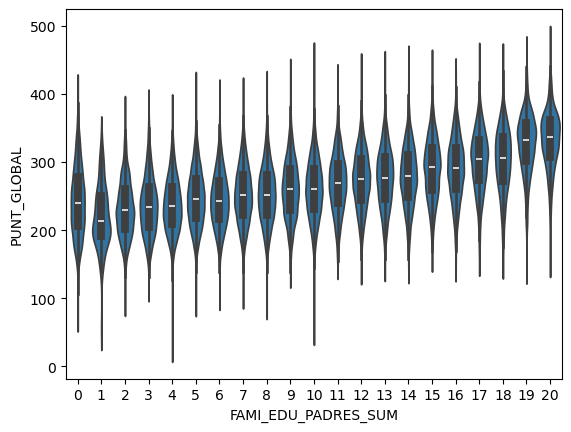

In [106]:
sns.violinplot(
    data=df,
    x="FAMI_EDU_PADRES_SUM",
    y="PUNT_GLOBAL",
    
    inner="box"
)

In [107]:
df["EDU_PADRES_CAT"] = pd.cut(
    df["FAMI_EDU_PADRES_SUM"],
    bins=[-1, 6, 12, 20],
    labels=["Baja", "Media", "Alta"]
)

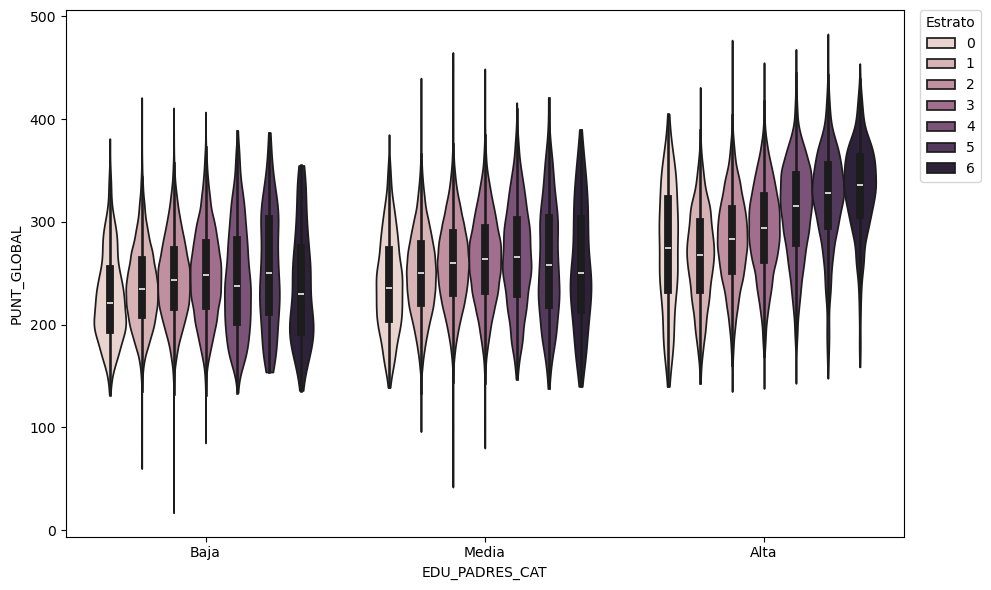

In [108]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

sns.violinplot(
    data=df,
    x="EDU_PADRES_CAT",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    inner="box",
    cut=0,
    ax=ax
)

ax.legend(
    title="Estrato",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()

### Mapa de Calor

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Asegura orden en el eje Y
df["EDU_PADRES_CAT"] = pd.Categorical(
    df["EDU_PADRES_CAT"],
    categories=["Baja", "Media", "Alta"],
    ordered=True
)

# (Opcional) ordenar estratos
orden_estrato = [0, 1, 2, 3, 4, 5, 6]
df["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(
    df["FAMI_ESTRATOVIVIENDA"],
    categories=orden_estrato,
    ordered=True
)

In [110]:
tabla_media = (
    df
    .pivot_table(
        index="EDU_PADRES_CAT",
        columns="FAMI_ESTRATOVIVIENDA",
        values="PUNT_GLOBAL",
        aggfunc="mean"
    )
)

/var/folders/20/k_nwfbln0fsb18fc01zwwkl80000gn/T/ipykernel_1903/4176710291.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


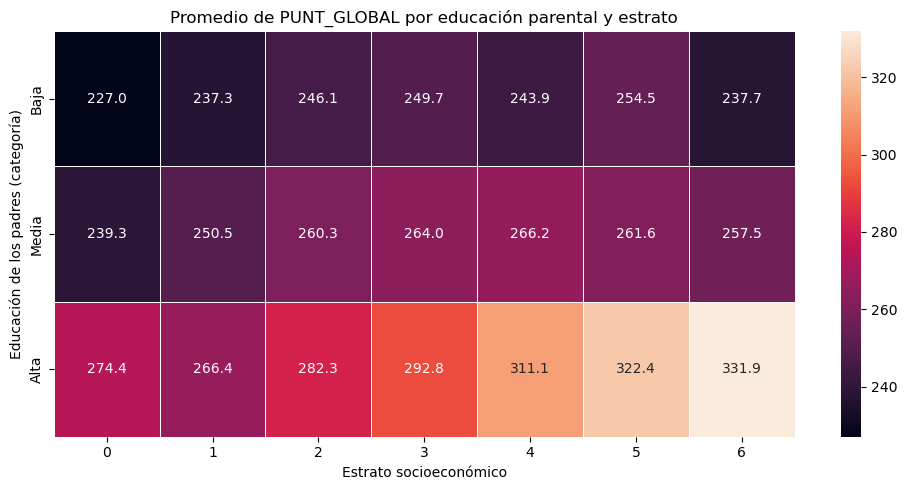

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    tabla_media,
    annot=True,        # muestra el número en cada celda
    fmt=".1f",         # 1 decimal
    linewidths=0.5,
    ax=ax
)

ax.set_title("Promedio de PUNT_GLOBAL por educación parental y estrato")
ax.set_xlabel("Estrato socioeconómico")
ax.set_ylabel("Educación de los padres (categoría)")

plt.tight_layout()
plt.show()

In [112]:
df_plot = df.copy()
tabla_n = (
    df_plot
    .pivot_table(
        index="EDU_PADRES_CAT",
        columns="FAMI_ESTRATOVIVIENDA",
        values="PUNT_GLOBAL",
        aggfunc="size"
    )
)

/var/folders/20/k_nwfbln0fsb18fc01zwwkl80000gn/T/ipykernel_1903/2046132885.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


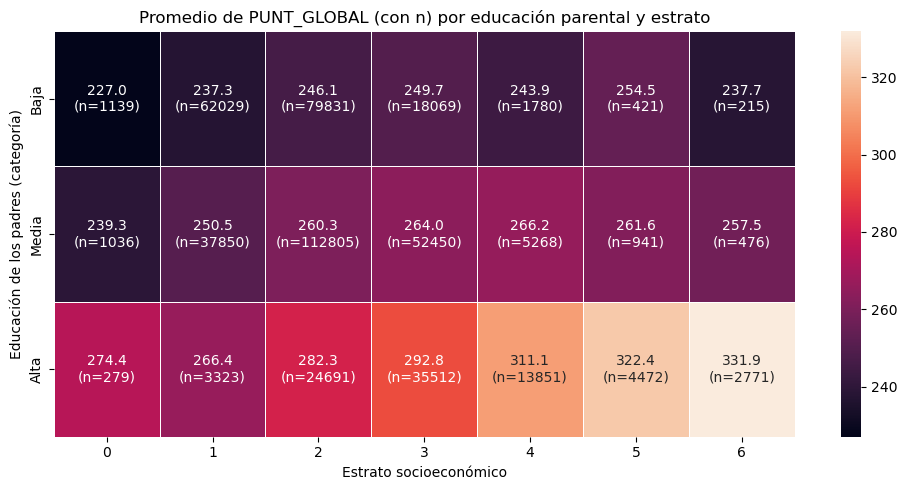

In [113]:
labels = tabla_media.round(1).astype(str) + "\n(n=" + tabla_n.fillna(0).astype(int).astype(str) + ")"

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    tabla_media,
    annot=labels,
    fmt="",
    linewidths=0.5,
    ax=ax
)

ax.set_title("Promedio de PUNT_GLOBAL (con n) por educación parental y estrato")
ax.set_xlabel("Estrato socioeconómico")
ax.set_ylabel("Educación de los padres (categoría)")

plt.tight_layout()
plt.show()

###

/var/folders/20/k_nwfbln0fsb18fc01zwwkl80000gn/T/ipykernel_1903/1500658088.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


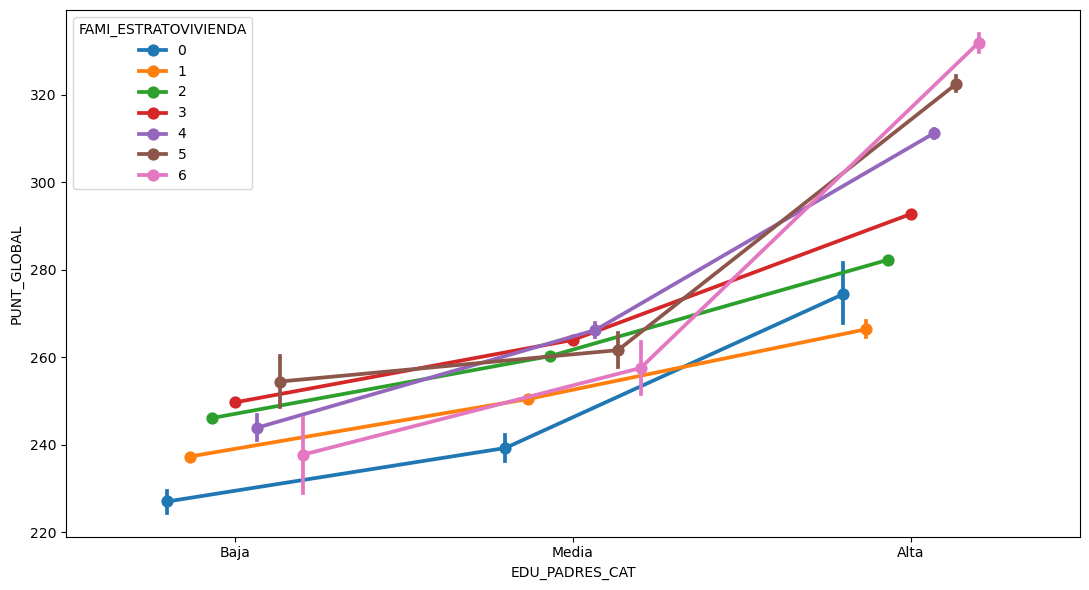

In [114]:

df_plot["PUNT_GLOBAL"] = pd.to_numeric(df_plot["PUNT_GLOBAL"], errors="coerce")
df_plot["FAMI_ESTRATOVIVIENDA"] = pd.to_numeric(df_plot["FAMI_ESTRATOVIVIENDA"], errors="coerce")

df_plot["EDU_PADRES_CAT"] = pd.Categorical(df_plot["EDU_PADRES_CAT"], ["Baja","Media","Alta"], ordered=True)

df_plot = df_plot.dropna(subset=["EDU_PADRES_CAT","FAMI_ESTRATOVIVIENDA","PUNT_GLOBAL"])
df_plot["FAMI_ESTRATOVIVIENDA"] = df_plot["FAMI_ESTRATOVIVIENDA"].astype(int).astype(str)

orden_estrato = [str(i) for i in [0,1,2,3,4,5,6]]

fig, ax = plt.subplots(figsize=(11, 6))
sns.pointplot(
    data=df_plot,
    x="EDU_PADRES_CAT",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    hue_order=orden_estrato,   # ✅ orden controlado
    estimator="mean",
    ci=95,
    n_boot=1000,
    dodge=0.4,
    markers="o",
    linestyles="-",
    ax=ax
)
plt.tight_layout()
plt.show()

In [115]:
print("df_plot shape:", df_plot.shape)
print(df_plot[["EDU_PADRES_CAT","FAMI_ESTRATOVIVIENDA","PUNT_GLOBAL"]].head(10))

print("\nConteos:")
print(df_plot["EDU_PADRES_CAT"].value_counts(dropna=False))
print(df_plot["FAMI_ESTRATOVIVIENDA"].value_counts(dropna=False))

print("\nNaN % en el df ORIGINAL (antes de limpiar):")
print(df[["EDU_PADRES_CAT","FAMI_ESTRATOVIVIENDA","PUNT_GLOBAL"]].isna().mean())

df_plot shape: (290366, 7)
  EDU_PADRES_CAT FAMI_ESTRATOVIVIENDA  PUNT_GLOBAL
0           Baja                    1        196.0
1          Media                    1        258.0
2          Media                    2        285.0
3          Media                    2        302.0
4          Media                    2        241.0
5          Media                    2        200.0
6           Baja                    2        301.0
7          Media                    0        196.0
8          Media                    3        313.0
9          Media                    2        256.0

Conteos:
EDU_PADRES_CAT
Media    139267
Baja      90823
Alta      60276
Name: count, dtype: int64
FAMI_ESTRATOVIVIENDA
2    130648
3     74089
1     61681
4     14950
5      4195
0      2454
6      2349
Name: count, dtype: int64

NaN % en el df ORIGINAL (antes de limpiar):
EDU_PADRES_CAT          0.000000
FAMI_ESTRATOVIVIENDA    0.024657
PUNT_GLOBAL             0.364984
dtype: float64


In [116]:
print(df["FAMI_ESTRATOVIVIENDA"].head(20))
print(df["FAMI_ESTRATOVIVIENDA"].value_counts(dropna=False).head(20))
print(df["FAMI_ESTRATOVIVIENDA"].dtype)

0     1
1     1
2     2
3     2
4     2
5     2
6     2
7     0
8     3
9     2
10    2
11    2
12    3
13    1
14    2
15    2
16    4
17    3
18    2
19    1
Name: FAMI_ESTRATOVIVIENDA, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]
FAMI_ESTRATOVIVIENDA
2      217327
3      106031
1      103202
4       20899
NaN     11609
5        5834
6        3462
0        2454
Name: count, dtype: int64
category


In [117]:
import statsmodels.formula.api as smf

# modelo base
modelo1 = smf.ols(
    "PUNT_GLOBAL ~ FAMI_EDU_PADRES_SUM + C(FAMI_ESTRATOVIVIENDA)",
    data=df_plot
).fit()

print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     9691.
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        19:58:05   Log-Likelihood:            -1.4985e+06
No. Observations:              290366   AIC:                         2.997e+06
Df Residuals:                  290358   BIC:                         2.997e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       